# DS 2500 HW 5

Due: Fri Mar 17 @ 11:59PM

### Submission Instructions
Please submit both of the following to the corresponding [gradescope](https://www.gradescope.com/courses/478298) assignment:
- this `.ipynb` file 
    - give a fresh `Kernel > Restart & Run All` just before uploading
- a `.py` file consistent with your `.ipynb`
    - `File > Download as ...`
    
Gradescope may run your `.py` submission to determine part of your score for this assignment.  See the [autograder instructions](https://github.com/matthigger/gradescope_auto_py/blob/main/stud_instruct.md) for details.


### Tips for success
- Start early
- Make use of [Piazza](https://course.ccs.neu.edu/ds2500/admin_piazza.html)
- Make use of [Office Hours](https://course.ccs.neu.edu/ds2500/office_hours.html)
- Remember that [Documentation / style counts for credit](https://course.ccs.neu.edu/ds2500/python_style.html)
- [No student may view or share their ungraded homework with another](https://course.ccs.neu.edu/ds2500/syllabus.html#academic-integrity-and-conduct)

# Overview: What contributes to property prices in the Boston area?

We're going to analyze a dataset that contains nearly 1000 different condos and houses available for sale circa 2021 in the Boston area. Based on the features of a place and it's location we will try to predict its price.

In [1]:
import pandas as pd

df_boston = pd.read_csv('boston_houses.csv', index_col=None)

df_boston.head()

,beds,baths,area,distance,price,price_bucket
0,3.0,2.0,2584.0,18.726140,1100000.0,price >= 900k
1,1.0,1.0,650.0,1.053808,699000.0,600k <= price < 900k
2,2.0,3.0,1794.0,0.471038,1750000.0,price >= 900k
3,4.0,3.0,1831.0,3.611435,979000.0,price >= 900k
4,3.0,3.0,1875.0,2.200608,1875000.0,price >= 900k


# Part 1: Decision Tree Classifier (21 points)
Our desired target variable is continuous (`price`), though our classifiers require a categorical target (e.g. `species`).  To remedy this, we have first "binned" `price` into three buckets:

In [2]:
df_boston['price_bucket'].value_counts()

price < 600k            321
price >= 900k           320
600k <= price < 900k    313
Name: price_bucket, dtype: int64

1. Build a Decision Tree with `max_depth=2` which estimates the `price_bucket` of housing using 
    - beds
    - baths
    - area
    - distance
1. Plot the tree using [plot_tree()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html).  To ensure the visualization is easily understood:
    - increase the size of the figure so text is easily read
    - utlize the `class_names` keyword input to `plot_tree()` which shows the most common class among the `values` shown
1. Validate your tree by identifying one intuitive behavior which it replicates (e.g. larger houses tend to be more expensive)
    - Remember the convention for reading the tree:
        - yes -> left
        - no -> right
        - after training, `dec_tree_clf.classes_` contains the order of classes shown in the `values` lists shown in the tree
    - Please summarize the intuition identified in the tree in a markdown cell just below the tree itself


In [3]:
df_boston

,beds,baths,area,distance,price,price_bucket
0,3.0,2.0,2584.0,18.726140,1100000.0,price >= 900k
1,1.0,1.0,650.0,1.053808,699000.0,600k <= price < 900k
2,2.0,3.0,1794.0,0.471038,1750000.0,price >= 900k
3,4.0,3.0,1831.0,3.611435,979000.0,price >= 900k
4,3.0,3.0,1875.0,2.200608,1875000.0,price >= 900k
...,...,...,...,...,...,...
949,3.0,3.0,1859.0,1.962427,3849000.0,price >= 900k
950,2.0,2.0,1010.0,4.443581,609999.0,600k <= price < 900k
951,2.0,2.0,1088.0,3.924278,785000.0,600k <= price < 900k
952,2.0,2.0,1212.0,4.046062,799000.0,600k <= price < 900k


In [4]:
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt

In [5]:
def train_dec_tree(df_boston, max_depth=2, x_feat_list=None):
    """ trains a decision tree classifier, prints graph
    
    Args:
        df_boston (pd.DataFrame): boston apartments 
        max_depth (int): max depth of decision tree
        x_feat_list (list): list of input features
        plot (bool): toggles graph output (default: True)
        
    Returns:
        dec_tree_clf (DecisionTreeClassifier): trained
            decicision tree
    """
    
    if x_feat_list is None:
        # default x_feat_list
        x_feat_list = ['beds', 'baths', 'area', 'distance']

    # extract data from dataframe
    x = df_boston.loc[:, x_feat_list].values
    y = df_boston.loc[:, 'price_bucket'].values
    
    # build decision tree classifier
    dec_tree_clf = tree.DecisionTreeClassifier(max_depth=max_depth)

    # fit data
    dec_tree_clf = dec_tree_clf.fit(x, y)
    
    return dec_tree_clf

In [6]:
def plot_tree(train_dec_tree):
    """ plot decision tree """
    
    x_feat_list = ['beds', 'baths', 'area', 'distance']
    
    plt.figure()
    plt.gcf().set_size_inches(15, 10)
    sns.set(font_scale=1.5)
    
    # 'plot' decision tree
    tree.plot_tree(train_dec_tree, 
                       feature_names=x_feat_list, class_names=train_dec_tree.classes_);

In [7]:
# plot
decision_tree = train_dec_tree(df_boston, max_depth=2)

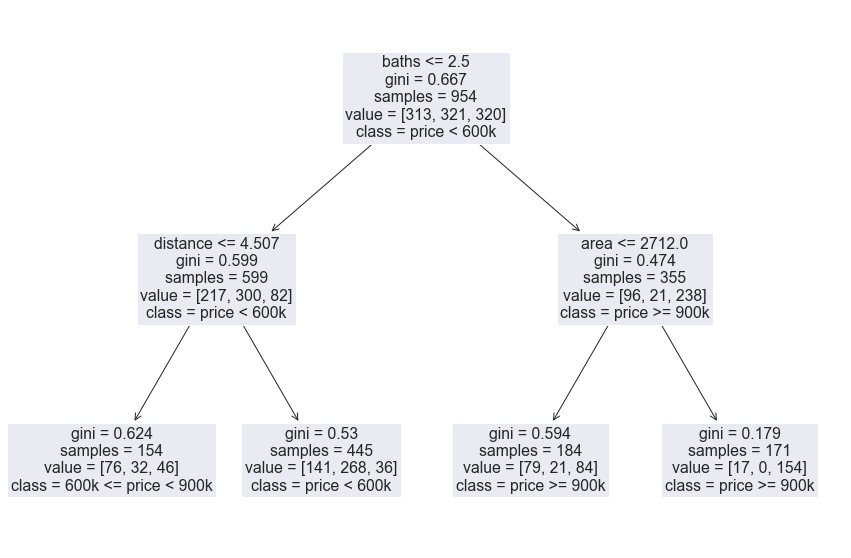

In [8]:
plot_tree(decision_tree)

### <font color=royalblue>Validation:</font>

intuitive behavior: larger house tends to be more expensive
- bath <= 2.5 go right for more bath rooms
- area <= 2712.0 go right for larger area
- result: class = price >= 900k

This class price is higher than other results in other branches when comparing.

# Part 2: Random Forest Classification (23 points)
We'd like to quantify how significant each feature (i.e. 'beds', 'baths', 'area', 'distance') is in predicting the `price_bucket` of a property via a Random Forest Analysis.  Of course:

# Nobody cares which features are important to a classifier which doesn't work!

so, before we look at feature importance we must check that our classifier is able to predict `price_bucket` with reasonable accuracy (hint: the solution shows 70% accuracy, which is sufficient for our purposes here).

Using 10 fold cross validation with a Random Forest (max_depth=3) and the same x, y definitions as above:
- construct a confusion matrix which shows performance
- compute accuracy via [accuracy_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

In [9]:
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree
import numpy as np

In [10]:
x_feat_list = ['beds', 'baths', 'area', 'distance']

# extract data from dataframe
x = df_boston.loc[:, x_feat_list].values
y = df_boston.loc[:, 'price_bucket'].values

Text(0.5, 0.98, 'max_depth=3 decision tree')

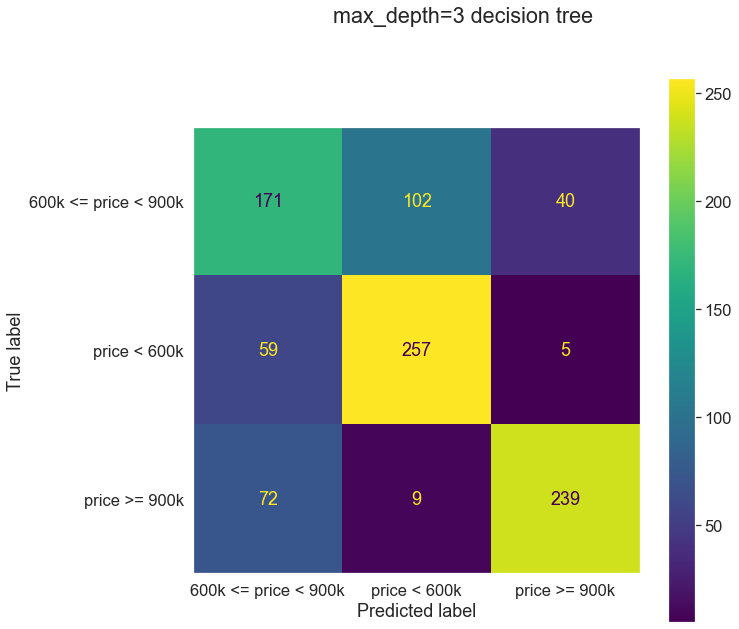

In [11]:
# confusion matrix
# initalized kfold
skfold = StratifiedKFold(n_splits=10)

# initalized random decision tree
dec_tree_clf = RandomForestClassifier(max_depth=3)


# initalized y_pred
y_pred = np.empty_like(y)

for train_idx, test_idx in skfold.split(x,y):
    # training data
    x_train = x[train_idx,:]
    y_train = y[train_idx]
    
    # testing data
    x_test = x[test_idx]
    
    # fit data
    dec_tree_clf = dec_tree_clf.fit(x_train, y_train)
    
    # estiamte on test data
    y_pred[test_idx] = dec_tree_clf.predict(x_test)

# build & plot
conf_mat = confusion_matrix(y_true=y, y_pred=y_pred)
conf_mat_display = ConfusionMatrixDisplay(conf_mat, display_labels=np.unique(y))

sns.set(font_scale=1.5)
conf_mat_display.plot()
plt.gcf().set_size_inches(10,10)
plt.grid(False)
plt.suptitle('max_depth=3 decision tree')

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred, normalize=True, sample_weight=None)

0.69916142557652

# Part 3 Feature Importance in Random Forest (16 points)
1. Fit a Random Forest Classifier on the *entire dataset.  
    - *without k-fold Cross Validation ...
1. Plot the Feature Importances, mean reduction in Gini scores, via `plot_feat_import()`
    - copy this function from class notes as is (no need to cite here)
1. In a markdown cell just below your feature importance plot:
    - synthesize the key takeaway message of the plot
        - write 1 or 2 complete sentences here
    - From the feature importance plot alone can we determine whether housing prices go up as the `area` increases?
        - write 1 complete sentence here    

In [13]:
rf_clf = RandomForestClassifier(n_estimators=100)

rf_clf.fit(x, y)

RandomForestClassifier()

In [14]:
def plot_feat_import(feat_list, feat_import, sort=True, limit=None):
    """ plots feature importances in a horizontal bar chart
    
    Args:
        feat_list (list): str names of features
        feat_import (np.array): feature importances (mean gini reduce)
        sort (bool): if True, sorts features in decreasing importance
            from top to bottom of plot
        limit (int): if passed, limits the number of features shown
            to this value    
    """
    
    if sort:
        # sort features in decreasing importance
        idx = np.argsort(feat_import).astype(int)
        feat_list = [feat_list[_idx] for _idx in idx]
        feat_import = feat_import[idx] 
        
    if limit is not None:
        # limit to the first limit feature
        feat_list = feat_list[:limit]
        feat_import = feat_import[:limit]
    
    # plot and label feature importance
    plt.barh(feat_list, feat_import)
    plt.gcf().set_size_inches(5, len(feat_list) / 2)
    plt.xlabel('Feature importance\n (Mean % decreases across all Gini due to different features)')

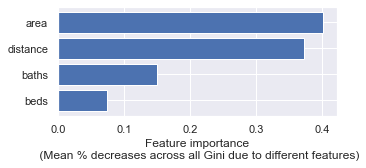

In [15]:
import numpy as np
import seaborn as sns

sns.set()

plot_feat_import(x_feat_list, rf_clf.feature_importances_)

### <font color=royalblue>Response:</font>

In this feature importance plot, we can see that the most important features that affect the price are area and distance. The number of beds has the least impact on the price. 

Based on the feature importance plot, we can determine the housing prices would increase when the area increases because "area" feature is the most important cause of price change. 

# Part 4: `RandomForestRegressor` and housing prices
In earlier parts of this HW, we used a `DecisionTree` and `RandomForestClassifier` to predict `price_bucket`.  Here we use a `RandomForestRegressor` to predict the housing `price` (not just the `price_bucket`).

See [this video](https://youtu.be/SiovCeiKuSY) (same as for lab5) for an "introduction" to `RandomForestRegressor`.

## Part 4.1: Compute a cross validated $R^2$ for a `RandomForestRegressor` (9 points)
    ... nobody cares which features are important in a regression model which can't predict accurately

In [16]:
import pandas as pd

df_house = pd.read_csv('boston_houses.csv', index_col=None)

df_house.head()

,beds,baths,area,distance,price,price_bucket
0,3.0,2.0,2584.0,18.726140,1100000.0,price >= 900k
1,1.0,1.0,650.0,1.053808,699000.0,600k <= price < 900k
2,2.0,3.0,1794.0,0.471038,1750000.0,price >= 900k
3,4.0,3.0,1831.0,3.611435,979000.0,price >= 900k
4,3.0,3.0,1875.0,2.200608,1875000.0,price >= 900k


In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from copy import copy

In [18]:
x_feat_list = ['beds', 'baths', 'area', 'distance']
x = df_house.loc[:, x_feat_list].values
y = df_house.loc[:, 'price'].values


In [19]:
# initalized kfold
kfold = KFold(n_splits=10, shuffle=True)

# regressor
regressor = RandomForestRegressor()

# initalized y_pred
y_pred = copy(y)

for train_idx, test_idx in kfold.split(x, y):
    # training data
    x_train = x[train_idx,:]
    y_train = y[train_idx]
    
    # testing data
    x_test = x[test_idx]
    
    # fit 
    regressor.fit(x_train, y_train)

    # predict
    y_pred[test_idx] = regressor.predict(x_test)
    
r2 = r2_score(y_true=y, y_pred=y_pred)
r2

0.7394346340156159

## Part 4.2. Plot the feature importances of your `RandomForestRegressor` (8 points)

You should update `plot_feat_import()` to properly label the x axis.  (`RandomForestClassifier`s minimize Gini, what do `RandomForestRegressor`s minimize?)

In [20]:
def plot_feat_import(feat_list, feat_import, sort=True, limit=None):
    """ plots feature importances in a horizontal bar chart
    
    Args:
        feat_list (list): str names of features
        feat_import (np.array): feature importances (mean gini reduce)
        sort (bool): if True, sorts features in decreasing importance
            from top to bottom of plot
        limit (int): if passed, limits the number of features shown
            to this value    
    """
    
    if sort:
        # sort features in decreasing importance
        idx = np.argsort(feat_import).astype(int)
        feat_list = [feat_list[_idx] for _idx in idx]
        feat_import = feat_import[idx] 
        
    if limit is not None:
        # limit to the first limit feature
        feat_list = feat_list[:limit]
        feat_import = feat_import[:limit]
    
    # plot and label feature importance
    plt.barh(feat_list, feat_import)
    plt.gcf().set_size_inches(5, len(feat_list) / 2)
    plt.xlabel('Feature importance\n (Mean % decreases in R^2 due to different features)')

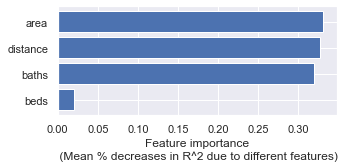

In [21]:
import numpy as np
import seaborn as sns
x_feat_list = ['beds', 'baths', 'area', 'distance']

# extract data from dataframe
x = df_house.loc[:, x_feat_list].values
y = df_house.loc[:, 'price'].values

rfreg = RandomForestRegressor()
rfreg.fit(x, y)

sns.set()

plot_feat_import(x_feat_list, rfreg.feature_importances_)


## Part 4.3 Regressor vs Classifier? (7 points) 
Between the `RandomForestRegressor` and `RandomForestClassifier`, explain which feature importance graph you trust more.

### hints: 
- does the `RandomForestClassifier` distinguish between different house prices within a single bucket?
- wasn't our choice of 3 buckets somewhat arbitrary?  What if we used 10 price buckets instead, this can change the feature importances ... 

### <font color=royalblue>Response:</font>
Between `RandomForestRegressor` and `RandomForestClassifer`, I would trust the `RandomForestRegressor` more because it shows a plot of all the houses and provides specific information about each plot. In the `RandomForestClassifer`, I would not be able to tell the exact price of the house because they are groups into certain range groups. On the other hand, I can use `RandomForestRegressor` and find the price related that specific house.

# Part 5: Ethics of Housing Pricing (16 points)

Using any housing model built and trained as above could (and likely would) do real harm to people if used without careful thought.  **Remember, these models only mimic and recreate the relationships between housing features and price in input data.  Given this, the predictions should be understood as a reflection of the flawed world from which they come and not some necessarily truthful, objective insight.** (I worry the mathematical complexity and "high-tech-factor" of many Machine Learning models gives them some credibility they haven't earned!)

In the case of predicting housing prices in Boston, we should be mindful of Redlining.  Naively used, this model can propogate and promote racist real estate processes via their influence in future housing prices.

Using the resources listed below, identify two distinct ways in which a biased model (one which overvalues the houses of white people while undervaluing the houses of people of color) might propogate [racism](http://msan.wceruw.org/conferences/2015-studentConf/Defining%20Racism%20by%20Beverly%20Daniel%20Tatum.pdf) if used to predict housing values (e.g. [Zillow](https://www.zillow.com/) or similar).  Please give each of the two impacts its own markdown heading (`###`) and write one to three sentences which characterize it.

- [Wikipedia on Redlining](https://en.wikipedia.org/wiki/Redlining)
    - good background
- [NPR Video (start here)](https://youtu.be/O5FBJyqfoLM?t=14) 
    - great summary
    - hint: they do mention 4 specific impacts of redlining ... any two would be sufficient here
    - be mindful of some spicy language and dark humor from Chris Rock which opens the video
- [NYTimes article](https://www.nytimes.com/2021/03/20/opinion/home-value-race-taxes.html) 
    - strong, specific stats
- [NyTimes article](https://www.nytimes.com/2022/08/18/realestate/housing-discrimination-maryland.html)
    - compelling single example
    
Note that the negative impact of the model does not require the model's builder have malicious intentions.  It is entirely possible that one can build and utilize models without considering the real world harm they could have when deployed.  (Its unsurprising even, when you consider how much thought we put into our more easily quantifiable objectives: $R^2$, accuracy, confusion matrix scores ... there's so much technical detail to get lost in we may not take our hands off the keyboard for long enough to appreciate the very real impact of the work we do!).  My own belief is that much of the harm ML models have done, in practice, is not the result of bad people intentionally building harmful models but everyday people, like you and I, not being thoughtful enough in how the ML models will be used in the real world.

### <font color=royalblue>Biased Model 1- overvalues the houses of white people & undervalues the houses of POC</font>
One way in which a biased model might propogate racism if used to predict housing value is driving down home values of a POC, which was one of the impact caused by redlining. Since redlining defined districts based on race, occupation, and money, many POC homeowners have houses in undesirable locations near industrial plants or far away from grocery stores.

### <font color=royalblue>Biased Model 2- overvalues the houses of white people & undervalues the houses of POC</font>

Another way in which a biased model might propogate racism if used to predict housing value is overevaluating home values of white people based on school districts. Because the school has large fundings, it can provide more resources to the students. Families are attracted to such locations because they want their kids to gain a good education. Thus with a huge demand and low quantities, the prices for the nearby homes increase beyond its expected value.
